In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import cv2
#import scipy.ndimage
import numpy as np
from matplotlib import pyplot as plt
import glob

import sys
sys.path.append('../scripts')
import util
import ip_routines as ip
import os
cwd=os.getcwd()
print("cwd = " + cwd)
verbose = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cwd = /media/militho/DIF_DATA/data/notebooks


In [3]:
def calulateDeltaRatio(img1, img2):
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    delta_img = ip.deltaImage(bg_img, fg_img, 5)
    #blue_chan_mean = np.abs(np.mean(blue_chan))
    hist = np.bincount(delta_img.ravel(),minlength=256)
    ratio = float(hist[-1])/float(hist[0])
    return hist[0], hist[1], ratio

Image Engine initialized with /media/militho/DIF_DATA/data/notebooks/../projects/contact_front/MR_NewCam/2015-08-04_DFI28-*.png
 Total images: 20
Adding image to queue...
Adding image to queue...
Adding image to queue...
Adding image to queue...
Adding image to queue...
Adding image to queue...
Adding image to queue...
Adding image to queue...
Adding image to queue...
Adding image to queue...
[10] Background Area: 1254176
---------------------------------------------------------------------
[11] Area: 1076750, Delta: -177426 
---------------------------------------------------------------------
[12] Area: 1046093, Delta: -30657 
---------------------------------------------------------------------
[13] Area: 856961, Delta: -189132 
---------------------------------------------------------------------
[14] Area: 805440, Delta: -51521 
---------------------------------------------------------------------
[15] Area: 716821, Delta: -88619 
--------------------------------------------------

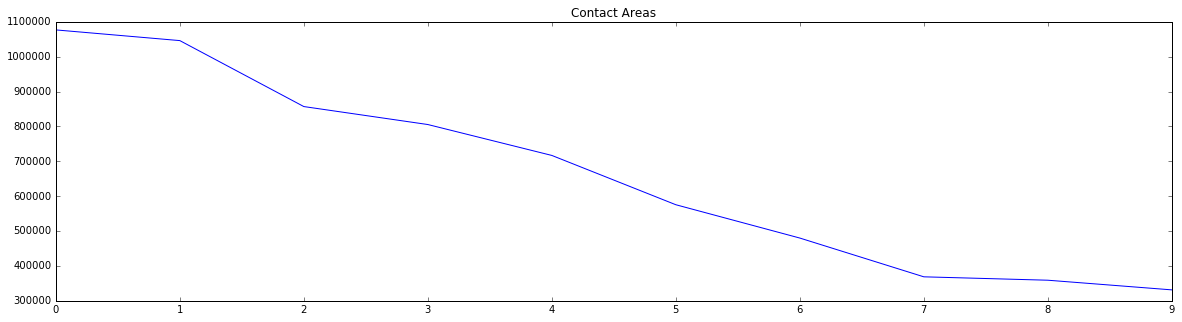

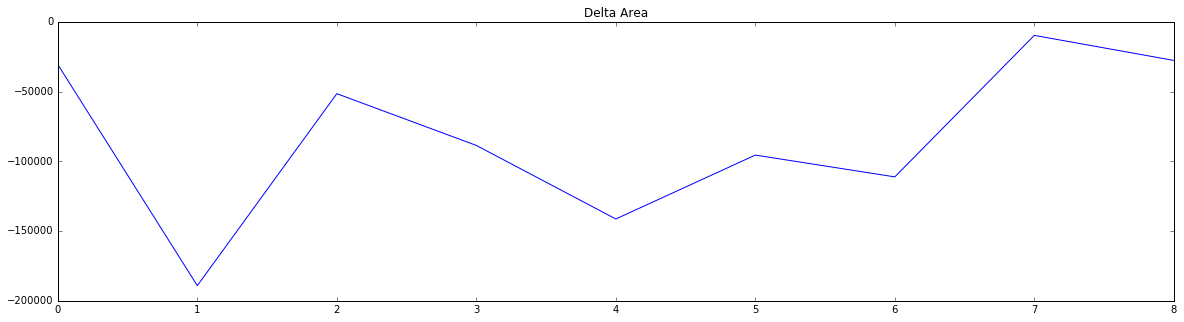

In [10]:
image_folder_lst = [cwd+'/../projects/contact_front/MR_NewCam']
#image_folder_lst = [cwd+'/../projects/contact_front/MR_NewCam/startAtFirstCircle']
#image_folder_lst = ['../projects/contact_front/MR_NewCam/transitionSet']
#image_folder_lst = ['../projects/contact_front/MR_NewCam/testSet']

file_spec = '2015-08-04_DFI28-*.png'
glob_spec = "%s/%s" % (image_folder_lst[0], file_spec)
eng = util.Image_Engine(glob_spec, is_glob=True)

delay_s=0.01
do_plot=False  # must be False for running in notebook
verbose=True

ret, stats = ip.processImages_CumSumDiff(eng, delay_s, do_plot, verbose, '')

if len(stats['areas']) > 0:
    plt.figure(figsize=(10*2,5))
    plt.plot(stats['areas'])
    plt.title('Contact Areas')
    
if len(stats['deltas']) > 0:
    plt.figure(figsize=(10*2,5))
    plt.plot(stats['deltas'][1:]) # skip the first data pt since it includes non-active area 
    plt.title('Delta Area')


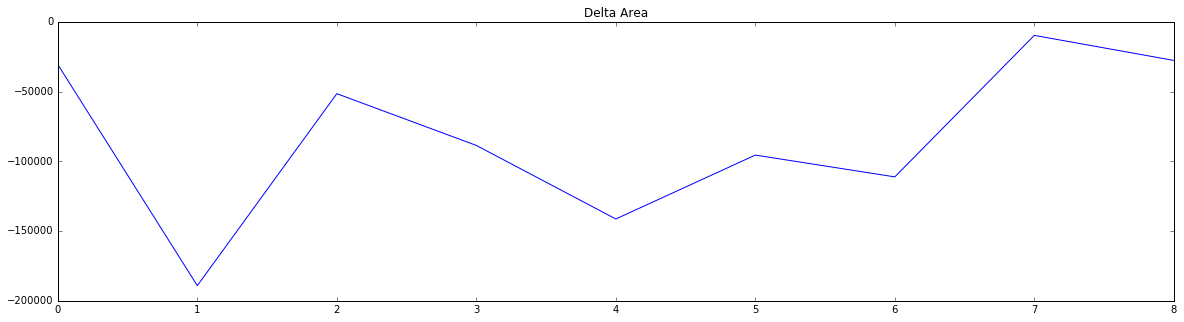

-189132

In [11]:
d = stats['deltas']
plt.figure(figsize=(10*2,5))
plt.plot(stats['deltas'][1:])
plt.title('Delta Area')
plt.show()
np.min(d)


In [14]:
image_folder_lst = [cwd+'/../projects/contact_front/MR_NewCam']
img_lst = util.Image_List(image_folder_lst, '2015-08-04_DFI28-*.png', doSort=True, color=True)

print( "Read %d images from %s" % (img_lst.cnt(), image_folder_lst[0]))

Read 20 images from /media/militho/DIF_DATA/data/notebooks/../projects/contact_front/MR_NewCam


Count non-zero before:  0
Count non-zero after :  50204
Count non-zero before:  50204
Count non-zero after :  380879


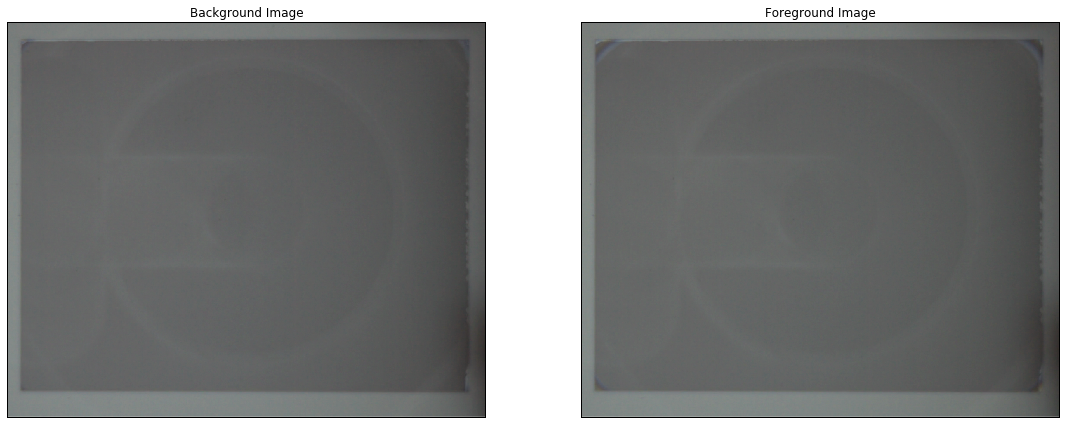

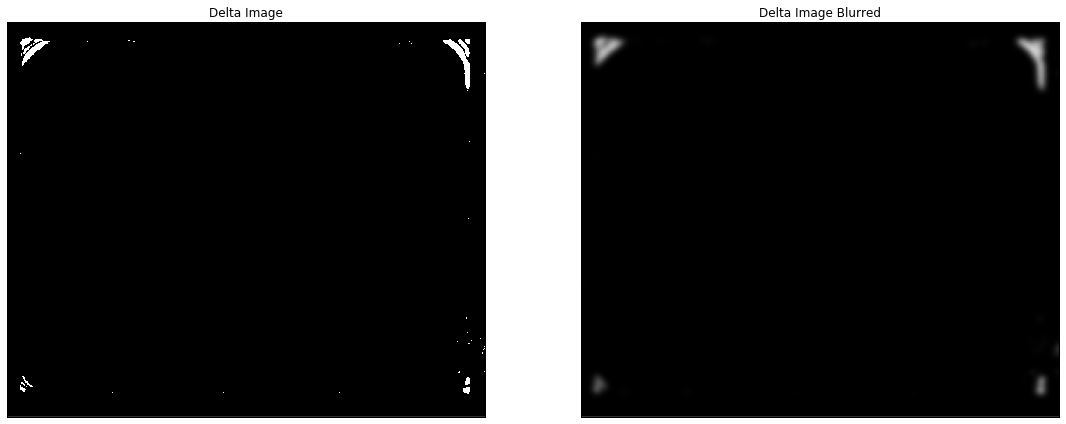

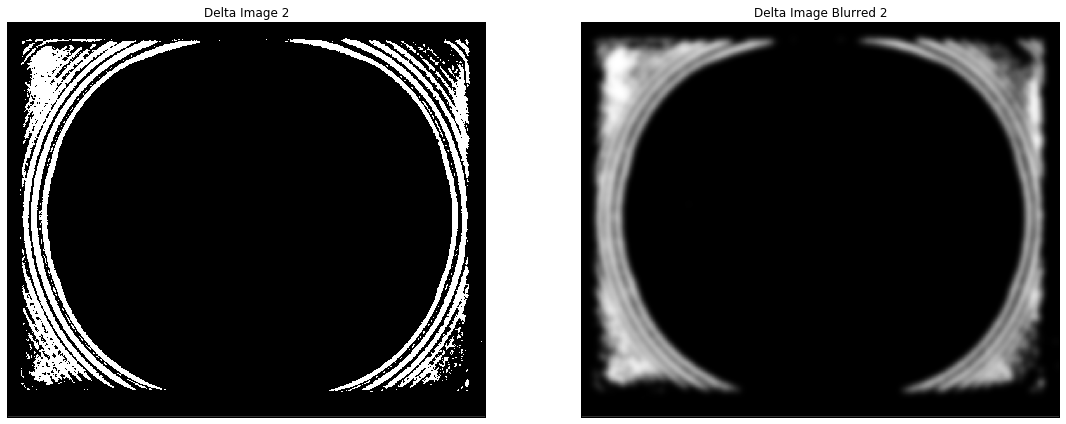

In [16]:
plot_lst = []
fg_num = 1
bg_img = img_lst.images[fg_num-1].copy()
fg_img = img_lst.images[fg_num].copy()

plot_lst.append( (bg_img, 'Background Image'))
plot_lst.append( (fg_img, 'Foreground Image'))

cum_img = np.zeros(fg_img.shape[:2], np.bool)

#delta_img = cv2.absdiff(bg_img, fg_img)
delta_img = ip.deltaImage(bg_img, fg_img, thresh_val=5)
plot_lst.append( (delta_img, 'Delta Image'))

delta_img_blurred = cv2.GaussianBlur(delta_img, (55, 55), 0)
plot_lst.append( (delta_img_blurred, 'Delta Image Blurred'))

print( "Count non-zero before: ", np.count_nonzero(cum_img))
cum_img = np.logical_or(cum_img, delta_img_blurred)
print( "Count non-zero after : ", np.count_nonzero(cum_img))

bg_img = fg_img
fg_img = img_lst.images[fg_num+1].copy()

delta_img = ip.deltaImage(bg_img, fg_img, thresh_val=5)
plot_lst.append( (delta_img, 'Delta Image 2'))

delta_img_blurred = cv2.GaussianBlur(delta_img, (55, 55), 0)
plot_lst.append( (delta_img_blurred, 'Delta Image Blurred 2'))

print ("Count non-zero before: ", np.count_nonzero(cum_img))
cum_img = np.logical_or(cum_img, delta_img_blurred)
print ("Count non-zero after : ", np.count_nonzero(cum_img))

util.plot_imgs(plot_lst, color=False, max_cols = 2)

blacks: 1248310, whites: 0, ratio: 0.00470


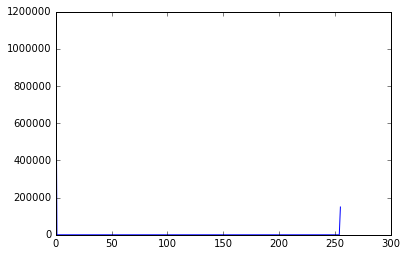

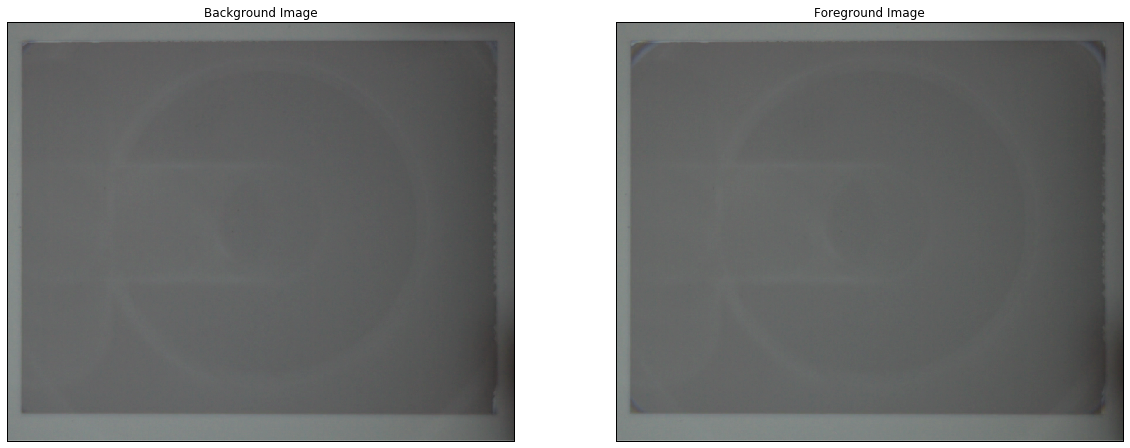

In [17]:
plot_lst = []
fg_num = 1
bg_img = img_lst.images[fg_num-1].copy()
fg_img = img_lst.images[fg_num].copy()

plot_lst.append( (bg_img, 'Background Image'))
plot_lst.append( (fg_img, 'Foreground Image'))

hist = np.bincount(delta_img.ravel(),minlength=256)

plt.plot( hist)

#rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

blacks = hist[0]
whites = hist[-1]
ratio = float(whites)/float(blacks)

blacks, whites, ratio = calulateDeltaRatio(bg_img, fg_img)
print ("blacks: %d, whites: %d, ratio: %.5f" % (blacks, whites, ratio))

util.plot_imgs(plot_lst, color=False, max_cols = 2)

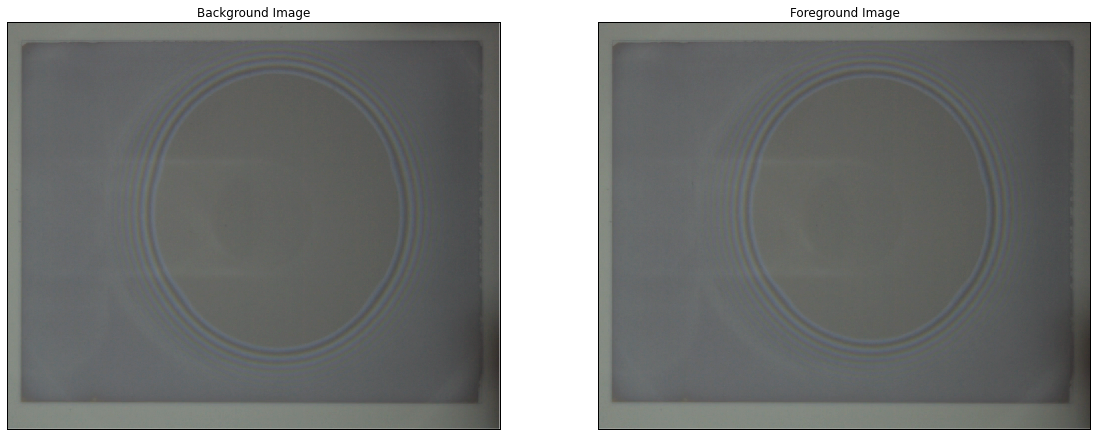

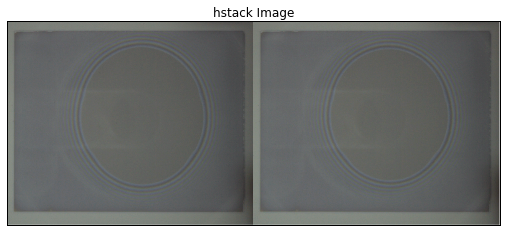

In [65]:
plot_lst = []
fg_num = 8
bg_img = img_lst.images[fg_num-1].copy()
fg_img = img_lst.images[fg_num].copy()

img = np.hstack((bg_img, fg_img))

plot_lst.append( (bg_img, 'Background Image'))
plot_lst.append( (fg_img, 'Foreground Image'))
plot_lst.append( (img, 'hstack Image'))

util.plot_imgs(plot_lst, color=False, max_cols = 2)

In [ ]:
video_file_path = cwd+'/../projects/contact_front/MR_NewCam/2015-08-04_DFI28.mp4'

cap = cv2.VideoCapture(video_file_path)

cnt = 0
prev_img = None

ratios = []
while(cap.isOpened()):
    ret, new_img = cap.read()
    cnt += 1
    
    if ret:
        if prev_img == None:
            prev_img = new_img
            continue

        blacks, whites, ratio = calulateDeltaRatio(prev_img, new_img)
        ratios.append(ratio)

print( "Done processing ", cnt, " images...")
print( "Found ", len(ratios), " data pts:")
plt.figure(figsize=(10*2,5))
plt.plot(ratios, color='b')
plt.title('RGB mean values from center ROI')

### 